In [1]:
#IMPORTING LIBRARIES

In [2]:
import numpy as np #NUMPY

In [3]:
import seaborn as sns #SEABORN

In [4]:
import pandas as pd #PANDA

In [5]:
from sklearn.preprocessing import MinMaxScaler   #SCIKIT LEARN

In [6]:
from google.colab import files   # UPLOADING THE CSV ( file containing dataset )
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [40]:
#LOADING DATASET FROM CSV
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [41]:
#BASIC INFORMATION OF DATASET
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())
print("\nStatistical Summary of Dataset:")
display(df.describe(include='all'))
print("\nCities present  in dataset:")
print(df['City'].unique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None

First 5 rows:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN



Statistical Summary of Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN



Cities present  in dataset:
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [9]:
#MISSING VALUES
print("Missing values before handling:")
print(df.isnull().sum())
#FILLING NUMERICAL COLUMNS WITH MEDIAN
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
                 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

#FILLING CATEGORICAL COLUMNS WITH MODE
if 'AQI_Bucket' in df.columns:
    df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

#VERIFYING
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing values after handling:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [10]:
#DUPLICATES REMOVAL
print(f"Total duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df.duplicated().sum()}")

Total duplicates before: 0
Duplicates after removal: 0


In [11]:
#NORMALIZATION OF DATA

#COLUMN SELECTION FOR NORMALIZING(except AQI)
cols_to_normalize = [col for col in numerical_cols if col != 'AQI' and col in df.columns]

#NORMALIZING (0 to 1 range)
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
print("\nNormalized data summary:")
display(df[cols_to_normalize].describe())


Normalized data summary:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,0.067868,0.109650,0.042550,0.076523,0.066428,0.058954,0.012251,0.071297,0.131865,0.006285,0.015699,0.010497
std,0.062959,0.072325,0.055051,0.063640,0.063036,0.059592,0.038250,0.087726,0.078389,0.031323,0.037869,0.023842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033802,0.079306,0.015845,0.035809,0.031371,0.034091,0.003071,0.031364,0.080436,0.000527,0.002814,0.005752
50%,0.051087,0.095671,0.025265,0.059856,0.050296,0.044888,0.005062,0.047201,0.119626,0.002351,0.006530,0.005752
75%,0.076225,0.111871,0.044924,0.095679,0.077016,0.061622,0.007849,0.071189,0.165761,0.005318,0.013235,0.005752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#DATE TO DATETIME FORMAT (YYYY-MM-DD)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#CONVERTING CATEGORICAL DATA TO NUMERIC
df = pd.get_dummies(df, columns=['City', 'AQI_Bucket'], drop_first=True)
print("\n=== Final Dataset Shape ===")
print(df.shape)
display(df.head())


=== Final Dataset Shape ===
(29531, 47)


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,2015-01-01,0.051087,0.095671,0.002304,0.050276,0.036674,0.044888,0.005233,0.142533,0.517422,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-02,0.051087,0.095671,0.002432,0.043291,0.035199,0.044888,0.005517,0.126593,0.132120,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-03,0.051087,0.095671,0.044489,0.053258,0.063512,0.044888,0.098970,0.149910,0.119083,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-04,0.051087,0.095671,0.004300,0.050994,0.038428,0.044888,0.009670,0.095847,0.139958,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-05,0.051087,0.095671,0.056520,0.059111,0.080748,0.044888,0.125704,0.202837,0.152491,...,False,False,False,False,False,True,False,False,False,False


In [13]:
#DATAFRAME SAVED TO NEW CSV AFTER PROCESSING
df.to_csv('processed_air_quality.csv', index=False)
print("Processed data saved successfully!")

Processed data saved successfully!


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #MATPLOTLIB FOR GRAPHS AND PLOTS
%matplotlib inline

#VISUAL STYLING
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

In [15]:
#LOADINIG PROCESSED DATA
df = pd.read_csv('processed_air_quality.csv')

#BASIC INFORMATION OF DATASET
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (29531, 47)


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,2015-01-01,0.051087,0.095671,0.002304,0.050276,0.036674,0.044888,0.005233,0.142533,0.517422,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-02,0.051087,0.095671,0.002432,0.043291,0.035199,0.044888,0.005517,0.126593,0.132120,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-03,0.051087,0.095671,0.044489,0.053258,0.063512,0.044888,0.098970,0.149910,0.119083,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-04,0.051087,0.095671,0.004300,0.050994,0.038428,0.044888,0.009670,0.095847,0.139958,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-05,0.051087,0.095671,0.056520,0.059111,0.080748,0.044888,0.125704,0.202837,0.152491,...,False,False,False,False,False,True,False,False,False,False


Pollutant Impact on AQI (Absolute Correlation):


,AQI
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
O3,0.199100
NH3,0.097916


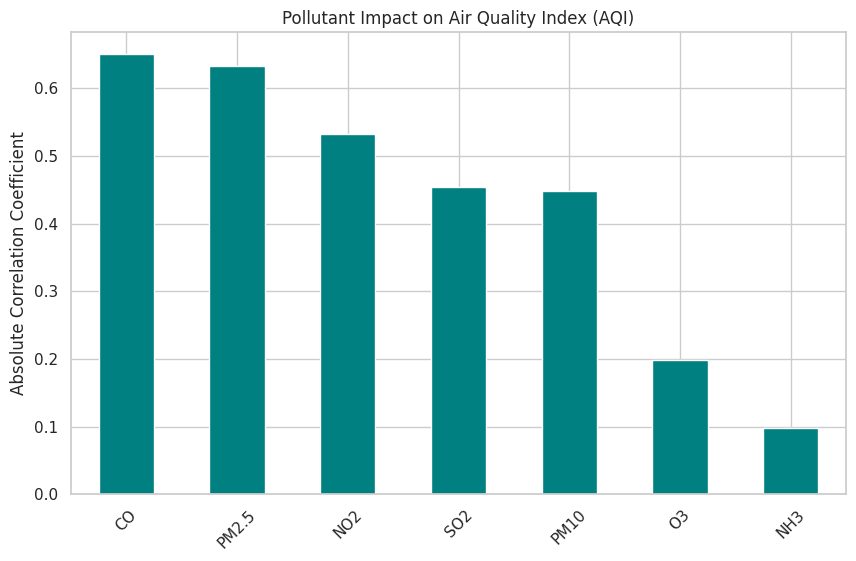

In [16]:
#IMPACT CALCULATION(correlation with AQI)
pollutant_impact = df[['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']].corr()['AQI'].abs().sort_values(ascending=False)

#IMPACT RANKING
print("Pollutant Impact on AQI (Absolute Correlation):")
display(pollutant_impact[1:])

#IMPACT VISUALISATION
plt.figure(figsize=(10, 6))
pollutant_impact[1:].plot(kind='bar', color='teal')
plt.title('Pollutant Impact on Air Quality Index (AQI)')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [17]:
#CORRELATION MATRIX FOR DIFFERENT POLLUTANTS
corr_matrix = df[['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']].corr()

#CORRELATION MATRIX( numerical )
print("Pollutant Correlation Matrix:")
display(corr_matrix)

Pollutant Correlation Matrix:


,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
PM2.5,1.000000,0.520767,0.358287,0.164615,0.093695,0.120451,0.166064,0.633654
PM10,0.520767,1.000000,0.352396,0.200548,0.023932,0.165468,0.208398,0.447686
NO2,0.358287,0.352396,1.000000,0.151731,0.361750,0.388413,0.289435,0.531952
NH3,0.164615,0.200548,0.151731,1.000000,-0.014252,-0.048679,0.076295,0.097916
CO,0.093695,0.023932,0.361750,-0.014252,1.000000,0.476784,0.043311,0.650475
SO2,0.120451,0.165468,0.388413,-0.048679,0.476784,1.000000,0.160489,0.454182
O3,0.166064,0.208398,0.289435,0.076295,0.043311,0.160489,1.000000,0.199100
AQI,0.633654,0.447686,0.531952,0.097916,0.650475,0.454182,0.199100,1.000000


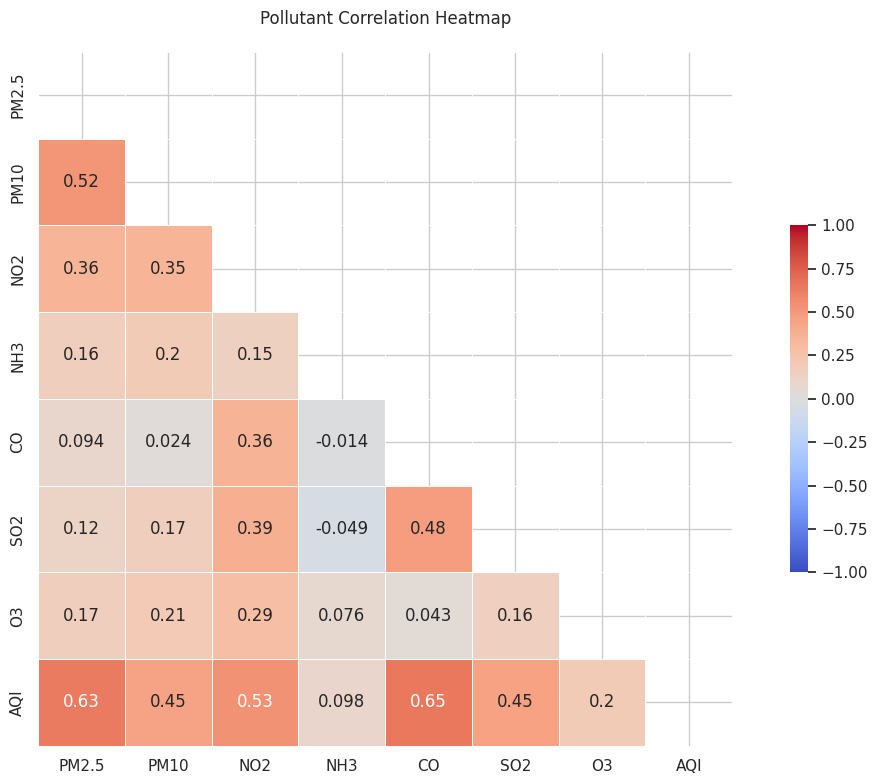

In [18]:
#HEATMAP ( pollution correlation )
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Pollutant Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

In [19]:
#SELECTION OF FEATURES BASED ON CORRELATION THRESHOLDS
high_corr_with_aqi = pollutant_impact[pollutant_impact > 0.5].index.tolist()
high_inter_correlation = []

#CHECKING HIGHLY CORRELATED POLLUTANTS
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and abs(corr_matrix.loc[col, idx]) > 0.5:  #THRESHOLD
            high_inter_correlation.append((col, idx))
print("Highly correlated pollutant pairs (|r| > 0.5):")
display(pd.DataFrame(high_inter_correlation, columns=['Pollutant 1', 'Pollutant 2']).drop_duplicates())
selected_features = list(set(high_corr_with_aqi) - {'AQI'})
print("\nSelected Features for Modeling:", selected_features)

Highly correlated pollutant pairs (|r| > 0.5):


,Pollutant 1,Pollutant 2
0,PM2.5,PM10
1,PM2.5,AQI
2,PM10,PM2.5
3,NO2,AQI
4,CO,AQI
5,AQI,PM2.5
6,AQI,NO2
7,AQI,CO



Selected Features for Modeling: ['NO2', 'CO', 'PM2.5']


In [20]:
#CREATION OF DATAFRAME WITH SELECTED FEATURES
try:
    df_selected = df[selected_features + ['AQI', 'Date', 'City']]
except KeyError:
    city_columns = [col for col in df.columns if col.startswith('City_')]
    df_selected = df[selected_features + ['AQI', 'Date'] + city_columns]
df_selected.to_csv('selected_features_air_quality.csv', index=False)
print("Selected features saved successfully!")

Selected features saved successfully!


In [21]:
#IMPORT MODELS FOR ML AND DATA PROCESSING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#LOAD PREPROCESSED DATA
df = pd.read_csv('selected_features_air_quality.csv')

#BINARY CREATION ( 1=Good,0=Bad )
if 'AQI_Bucket' in df.columns:
    df['Air_Quality'] = df['AQI_Bucket'].apply(lambda x: 1 if x in ['Good','Satisfactory'] else 0)
else:
    df['Air_Quality'] = df['AQI'].apply(lambda x: 1 if x <= 100 else 0)  #THRESHOLD AT AQI=100

X = df.drop(['Air_Quality', 'AQI', 'Date'], axis=1, errors='ignore')
y = df['Air_Quality']

In [23]:
#DATA SPLIT( 70% training,30% testing )
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: 20671 samples (70.0%)
Test set size: 8860 samples (30.0%)

Class distribution in training set:
Air_Quality
0    0.676116
1    0.323884
Name: proportion, dtype: float64


In [24]:
#SCALING OF DATA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#INITIALIZE AND TRAIN THE MODEL
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

#TRAINING ACCURACY
train_preds = logreg.predict(X_train_scaled)
print(f"Training Accuracy: {accuracy_score(y_train, train_preds):.4f}")

Training Accuracy: 0.8767



Test Accuracy: 0.8805

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5990
           1       0.83      0.80      0.81      2870

    accuracy                           0.88      8860
   macro avg       0.87      0.86      0.86      8860
weighted avg       0.88      0.88      0.88      8860



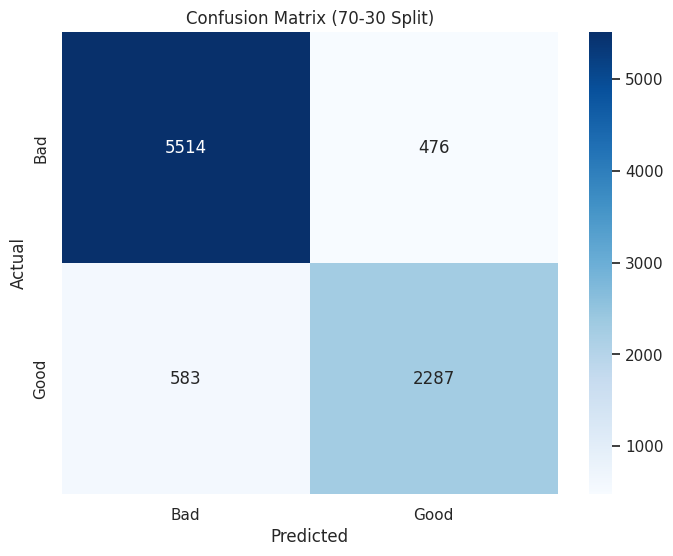

In [26]:
#PREDICTIONS
y_pred = logreg.predict(X_test_scaled)

#METRICS
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#CONFUSION MATRIX
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'],
            yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix (70-30 Split)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
#IMPORT EVALUTION METRICS AND VISUALISATION LIBRARIES
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [28]:
#TRAINED FILES
import joblib
joblib.dump(logreg, 'air_quality_logreg_model.pkl')
joblib.dump(scaler, 'air_quality_scaler.pkl')

['air_quality_scaler.pkl']

In [29]:
import joblib
import pandas as pd
model = joblib.load('air_quality_logreg_model.pkl')
scaler = joblib.load('air_quality_scaler.pkl')
#LOADING TEST DATA TO PREPARE LABELS & FEATURES
df_test = pd.read_csv('selected_features_air_quality.csv')
X_test = df_test.drop(['Air_Quality', 'AQI', 'Date'], axis=1, errors='ignore')
if 'AQI_Bucket' in df_test.columns:
    df_test['Air_Quality'] = df_test['AQI_Bucket'].apply(lambda x: 1 if x in ['Good', 'Satisfactory'] else 0)
else:
    df_test['Air_Quality'] = df_test['AQI'].apply(lambda x: 1 if x <= 100 else 0)
y_test = df_test['Air_Quality']
X_test_scaled = scaler.transform(X_test)

In [30]:
#PREDICTIONS OF CLASSES AND PROB
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [31]:
#MODEL EVALUATION METRICS
print("=== Model Evaluation Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\n=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Bad Air', 'Good Air']))

=== Model Evaluation Metrics ===
Accuracy: 0.8778
Precision: 0.8226
Recall: 0.7940
F1-Score: 0.8081
ROC AUC: 0.9391

=== Detailed Classification Report ===
              precision    recall  f1-score   support

     Bad Air       0.90      0.92      0.91     19966
    Good Air       0.82      0.79      0.81      9565

    accuracy                           0.88     29531
   macro avg       0.86      0.86      0.86     29531
weighted avg       0.88      0.88      0.88     29531



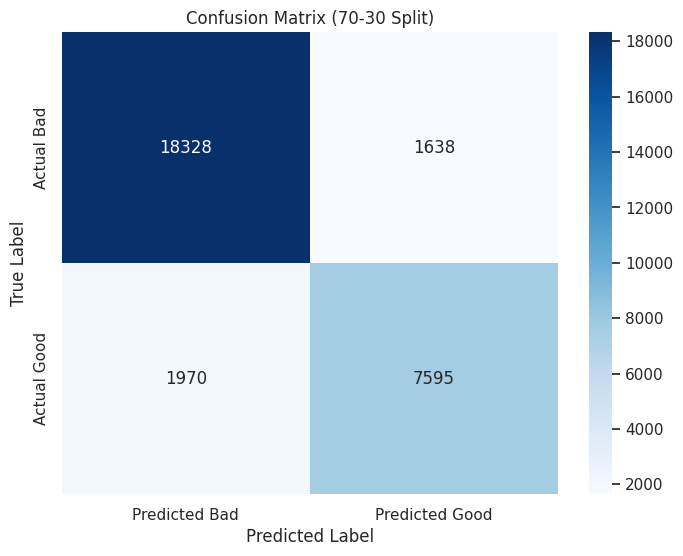

In [32]:
#CONFUSION MATRIX ( true vs predicted )
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.title('Confusion Matrix (70-30 Split)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

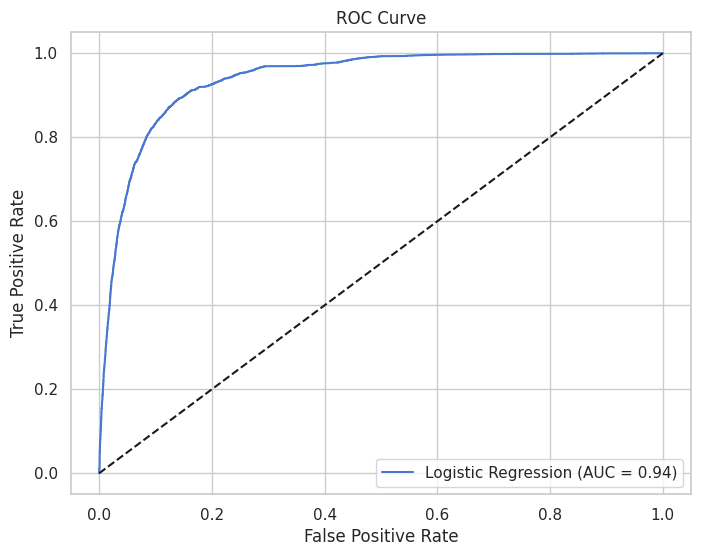

In [33]:
#ROC CURVE ( receiver operating characteristic )
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

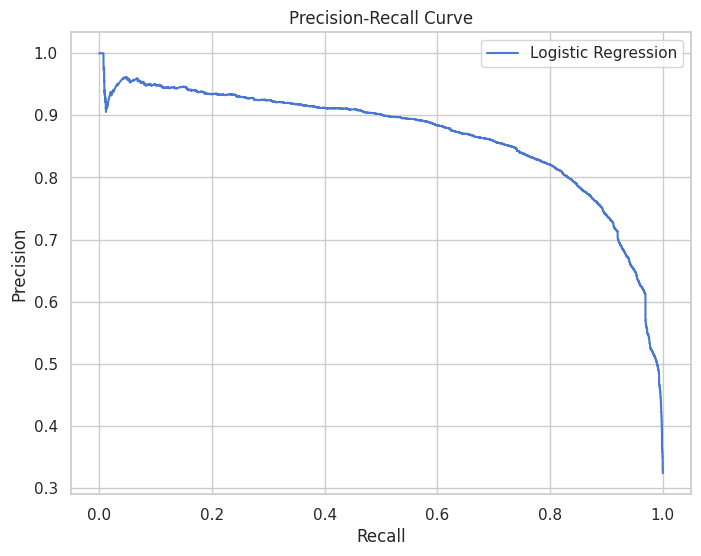

In [34]:
#PRECISON-RECALL CURVE
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [35]:
#DATAFRAME WITH INCORRECT PREDICTIONS
errors = X_test.copy()
errors['True_Label'] = y_test
errors['Predicted_Label'] = y_pred
errors['Prediction_Proba'] = y_pred_proba
errors = errors[y_test != y_pred]  #FILTERS MISCLASSIFIED EXAPMLES

print(f"\nNumber of misclassified samples: {len(errors)} ({len(errors)/len(y_test)*100:.1f}%)")

#ANALYSES UNCERTAIN PREDICTIONS( close to 0.5 prob)
errors['Confidence'] = np.abs(errors['Prediction_Proba'] - 0.5)
print("\nMost uncertain misclassifications:")
display(errors.sort_values('Confidence').head(5))


Number of misclassified samples: 3608 (12.2%)

Most uncertain misclassifications:


,NO2,CO,PM2.5,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,...,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,True_Label,Predicted_Label,Prediction_Proba,Confidence
13288,0.046356,0.000569,0.045181,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0.500108,0.000108
19098,0.059856,0.000000,0.053887,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0.500113,0.000113
8251,0.028355,0.009499,0.043687,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0.500152,0.000152
14070,0.024682,0.003925,0.041676,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0.500234,0.000234
13793,0.018636,0.009840,0.035065,False,False,False,False,False,False,False,...,False,False,False,False,False,False,1,0,0.499619,0.000381


In [36]:
import joblib
import pandas as pd
import numpy as np

#LOADING TRAINED MODEL AND SCALER
model = joblib.load('air_quality_logreg_model.pkl')
scaler = joblib.load('air_quality_scaler.pkl')

#LOADING TEST DATA
df_test = pd.read_csv('selected_features_air_quality.csv')

#DROPPING IRRELEVENAT COLUMNS
X_test = df_test.drop(['Air_Quality', 'AQI', 'Date'], axis=1, errors='ignore')

#SCALING
X_test_scaled = scaler.transform(X_test)

#PREDICTIONS
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

#CONVERT PROB TO CLASS PREDICTIONS
y_pred = (y_pred_proba >= 0.5).astype(int)

#DISPLAY PREDICTION WITH PROB
print("\nPredictions for the test data:")
for i, pred in enumerate(y_pred):
    result = "Good" if pred == 1 else "Bad"
    print(f"Sample {i+1}: Predicted as {result} (Probability: {y_pred_proba[i]:.2f})")



Predictions for the test data:
Sample 1: Predicted as Bad (Probability: 0.03)
Sample 2: Predicted as Bad (Probability: 0.03)
Sample 3: Predicted as Bad (Probability: 0.00)
Sample 4: Predicted as Bad (Probability: 0.02)
Sample 5: Predicted as Bad (Probability: 0.00)
Sample 6: Predicted as Bad (Probability: 0.00)
Sample 7: Predicted as Bad (Probability: 0.00)
Sample 8: Predicted as Bad (Probability: 0.00)
Sample 9: Predicted as Bad (Probability: 0.00)
Sample 10: Predicted as Bad (Probability: 0.04)
Sample 11: Predicted as Bad (Probability: 0.00)
Sample 12: Predicted as Bad (Probability: 0.00)
Sample 13: Predicted as Bad (Probability: 0.00)
Sample 14: Predicted as Bad (Probability: 0.00)
Sample 15: Predicted as Bad (Probability: 0.04)
Sample 16: Predicted as Bad (Probability: 0.02)
Sample 17: Predicted as Bad (Probability: 0.00)
Sample 18: Predicted as Bad (Probability: 0.00)
Sample 19: Predicted as Bad (Probability: 0.01)
Sample 20: Predicted as Bad (Probability: 0.00)
Sample 21: Predic

In [42]:
import pandas as pd
city_columns = [col for col in df_test.columns if col.startswith("City_")]
df_test['City'] = df_test[city_columns].idxmax(axis=1).str.replace("City_", "")
if 'Date' in df_test.columns:
    display_columns = ['City', 'Date', 'AQI']
else:
    display_columns = ['City', 'AQI']

#PREDICTIONS
df_test['Predicted_Air_Quality'] = y_pred
df_test['Actual_Air_Quality'] = y_test.reset_index(drop=True)

#TABLE FOR HTML OUTPUT
output_df = df_test[display_columns + ['Actual_Air_Quality', 'Predicted_Air_Quality']]

#SAVE AS HTML
output_df.to_html('predictions.html', index=False)
print("HTML file created successfully!")

HTML file created successfully!
